In [18]:
import pandas as pd

df = pd.read_csv("Baltimore911.csv", low_memory=False)

df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [19]:
# 1.

# Calculate the total number of call instances/rows and the total number of call features/columns
num_rows = df.shape[0]
num_cols = df.shape[1]

num_rows, num_cols

(292761, 16)

In [27]:
# Adjust the categorization to mark Longitude and Latitude as spatial data
categories['spatial'].extend(['Longitude', 'Latitude'])
categories['numeric'] = [col for col in categories['numeric'] if col not in categories['spatial']]

# Re-categorize the columns based on the adjusted categorization
data_types_adjusted = {
    col: 'numeric' if col in categories['numeric'] else 
         'discrete' if col in categories['discrete'] else 
         'spatial' for col in df.columns
}

data_types_adjusted

{'CrimeDate': 'discrete',
 'CrimeTime': 'discrete',
 'CrimeCode': 'discrete',
 'Location': 'discrete',
 'Description': 'discrete',
 'Inside/Outside': 'discrete',
 'Weapon': 'discrete',
 'Post': 'discrete',
 'District': 'discrete',
 'Neighborhood': 'discrete',
 'Longitude': 'spatial',
 'Latitude': 'spatial',
 'Location 1': 'numeric',
 'Premise': 'discrete',
 'vri_name1': 'discrete',
 'Total Incidents': 'numeric'}

In [28]:
# 3b: Numeric attributes statistics
numeric_stats = df[categories['numeric']].describe().T[['min', '25%', '50%', '75%', 'max', 'mean', 'std']]

# 3c: Discrete attributes statistics
discrete_stats = df[categories['discrete']].describe(include=['O']).T[['unique', 'top', 'freq']]

# 3d: Level of missingness
missingness = df.isnull().mean() * 100

numeric_stats, discrete_stats, missingness

(                 min  25%  50%  75%  max  mean  std
 Location 1       NaN  NaN  NaN  NaN  NaN   NaN  NaN
 Total Incidents  1.0  1.0  1.0  1.0  1.0   1.0  0.0,
                unique              top    freq
 CrimeDate        2300       04/27/2015     421
 CrimeTime        1475         18:00:00    6772
 CrimeCode          81               4E   48061
 Location        27064  1500 RUSSELL ST     847
 Description        14          LARCENY   65508
 Inside/Outside      4                O  128776
 Weapon              5          FIREARM   29036
 Post              133              114    5227
 District           10        NORTHEAST   44207
 Neighborhood      278         DOWNTOWN    9312
 Premise           125           STREET  104827
 vri_name1           8     Tri-District    6607,
 CrimeDate            0.000000
 CrimeTime            0.008881
 CrimeCode            0.000000
 Location             0.456345
 Description          0.000000
 Inside/Outside      11.531591
 Weapon              78.98217

In [26]:
# Mapping between the names used in the loop and the actual column names in the numeric_stats DataFrame
stat_mapping = {
    'Min': 'min',
    '25th Percentile': '25%',
    'Median': '50%',
    '75th Percentile': '75%',
    'Max': 'max',
    'Mean': 'mean',
    'Std Deviation': 'std'
}

# Map the Numeric Stats using the corrected mapping
for stat, actual_stat in stat_mapping.items():
    profile_df[stat] = None  # Initialize with None
    if actual_stat in numeric_stats.columns:
        profile_df.loc[profile_df['Data Type'] == 'numeric', stat] = profile_df['Attribute Name'].map(numeric_stats[actual_stat])

profile_df

,Attribute Name,Data Type,Missingness (%),Min,25th Percentile,Median,75th Percentile,Max,Mean,Std Deviation,Unique Values,Top Value,Top Value Frequency
0,CrimeDate,discrete,0.000000,None,None,None,None,None,None,None,2300,04/27/2015,421
1,CrimeTime,discrete,0.008881,None,None,None,None,None,None,None,1475,18:00:00,6772
2,CrimeCode,discrete,0.000000,None,None,None,None,None,None,None,81,4E,48061
3,Location,discrete,0.456345,None,None,None,None,None,None,None,27064,1500 RUSSELL ST,847
4,Description,discrete,0.000000,None,None,None,None,None,None,None,14,LARCENY,65508
5,Inside/Outside,discrete,11.531591,None,None,None,None,None,None,None,4,O,128776
6,Weapon,discrete,78.982173,None,None,None,None,None,None,None,5,FIREARM,29036
7,Post,discrete,0.811584,None,None,None,None,None,None,None,133,114,5227
8,District,discrete,0.000000,None,None,None,None,None,None,None,10,NORTHEAST,44207
9,Neighborhood,discrete,3.587910,None,None,None,None,None,None,None,278,DOWNTOWN,9312


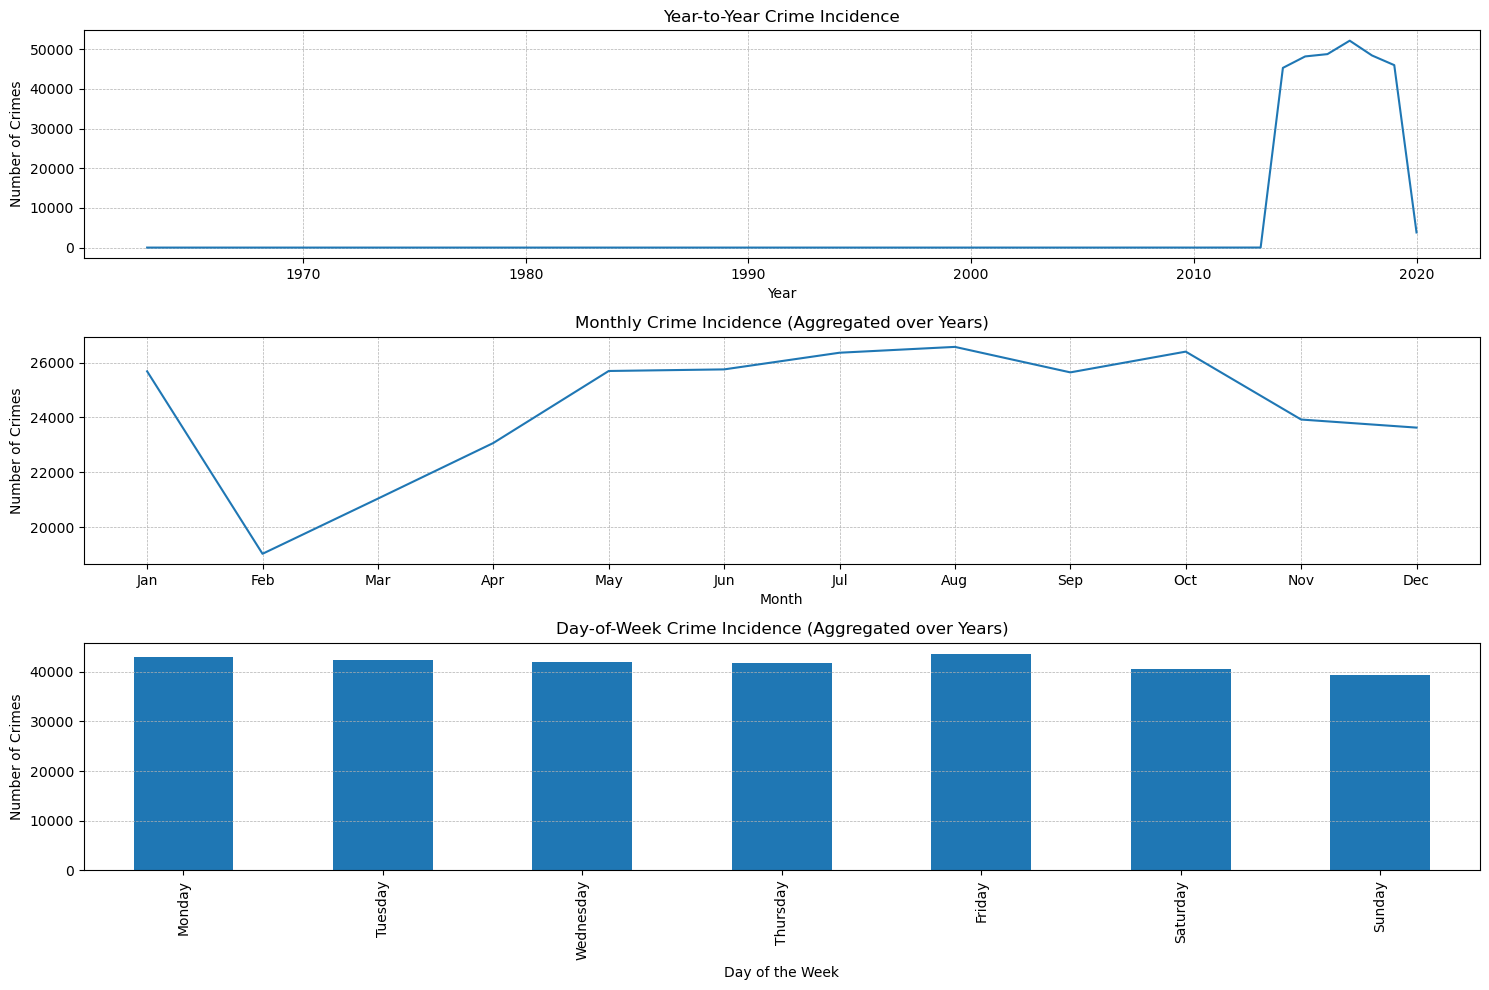

In [29]:
# 2.

import matplotlib.pyplot as plt

# Convert the CrimeDate column to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of week
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Initialize the figure
plt.figure(figsize=(15, 10))

# 1. Year-to-Year Pattern
plt.subplot(3, 1, 1)
df.groupby('Year').size().plot()
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 2. Monthly Pattern
plt.subplot(3, 1, 2)
df.groupby('Month').size().plot()
plt.title('Monthly Crime Incidence (Aggregated over Years)')
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 3. Day-of-Week Pattern
plt.subplot(3, 1, 3)
df.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Day-of-Week Crime Incidence (Aggregated over Years)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

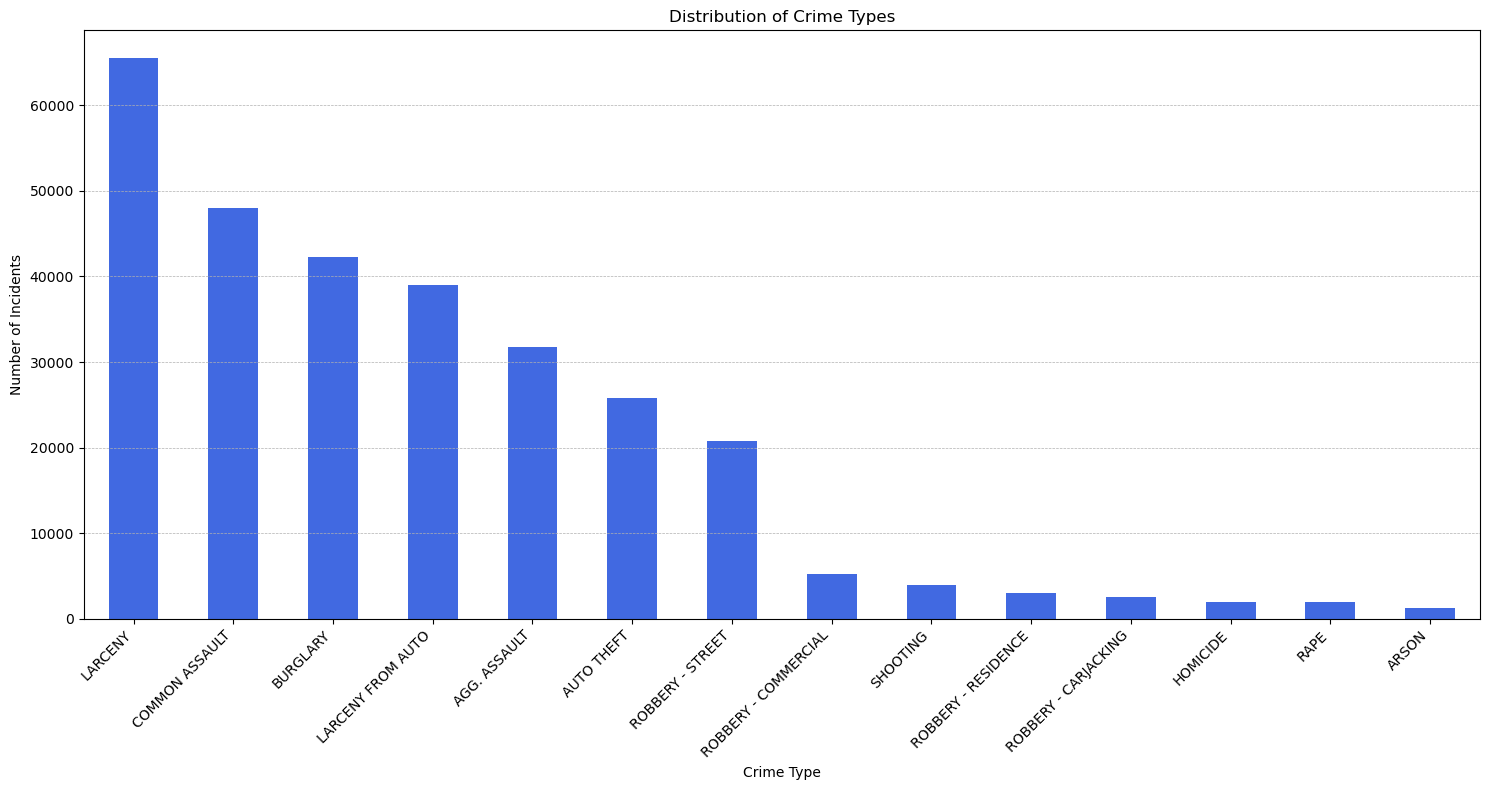

In [30]:
# 3.

# Initialize the figure
plt.figure(figsize=(15, 8))

# Count the occurrences of each crime type and plot
crime_counts = df['Description'].value_counts()
crime_counts.plot(kind='bar', color='royalblue')

# Set the title and labels
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

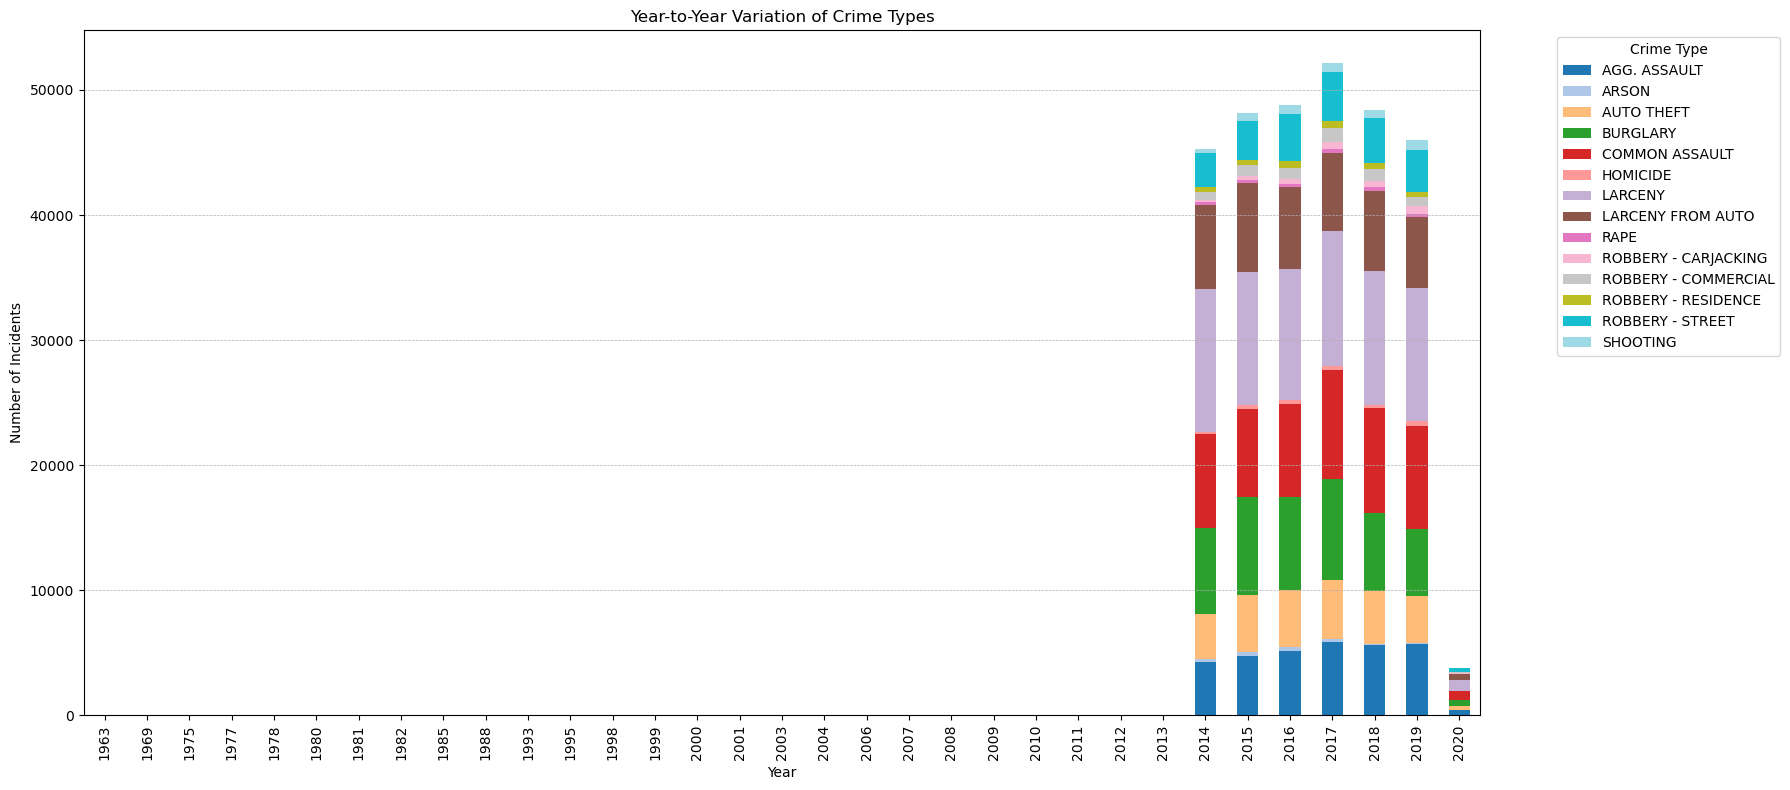

In [31]:
# 4. 

# Year-to-Year Variation of Crime Types

# Group by year and crime description to get counts
yearly_crime_counts = df.groupby(['Year', 'Description']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(18, 10))
yearly_crime_counts.plot(kind='bar', stacked=True, figsize=(18, 8), colormap='tab20')

plt.title('Year-to-Year Variation of Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

<Figure size 1800x1000 with 0 Axes>

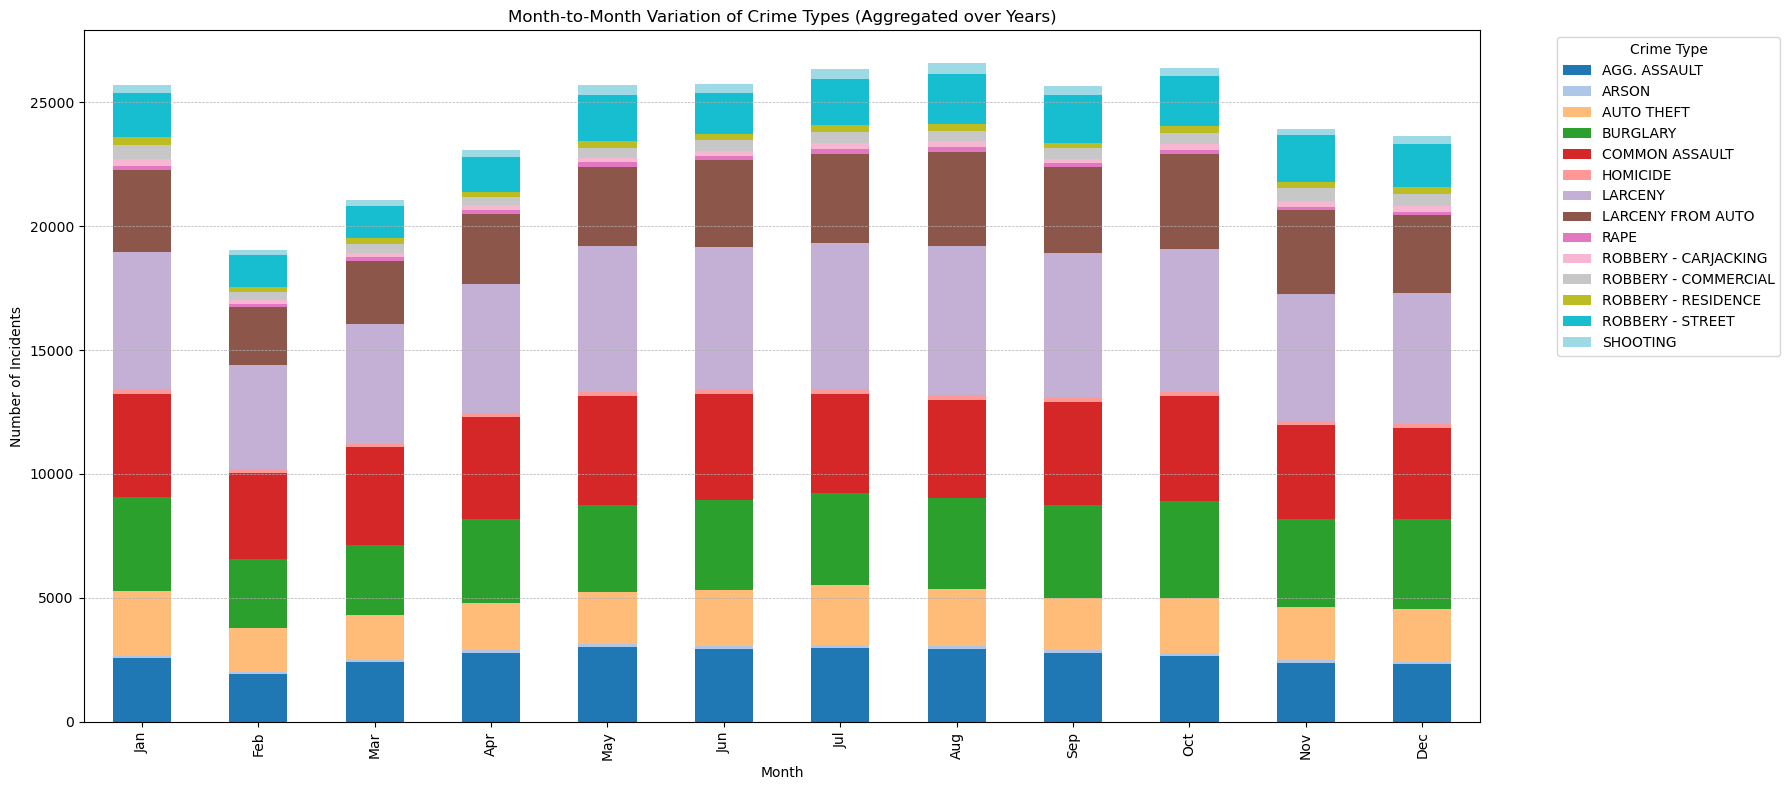

In [32]:
# 4. 

# Month-to-Month Variation of Crime Types

# Group by month and crime description to get counts
monthly_crime_counts = df.groupby(['Month', 'Description']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(18, 10))
monthly_crime_counts.plot(kind='bar', stacked=True, figsize=(18, 8), colormap='tab20')

plt.title('Month-to-Month Variation of Crime Types (Aggregated over Years)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

<Figure size 1800x1000 with 0 Axes>

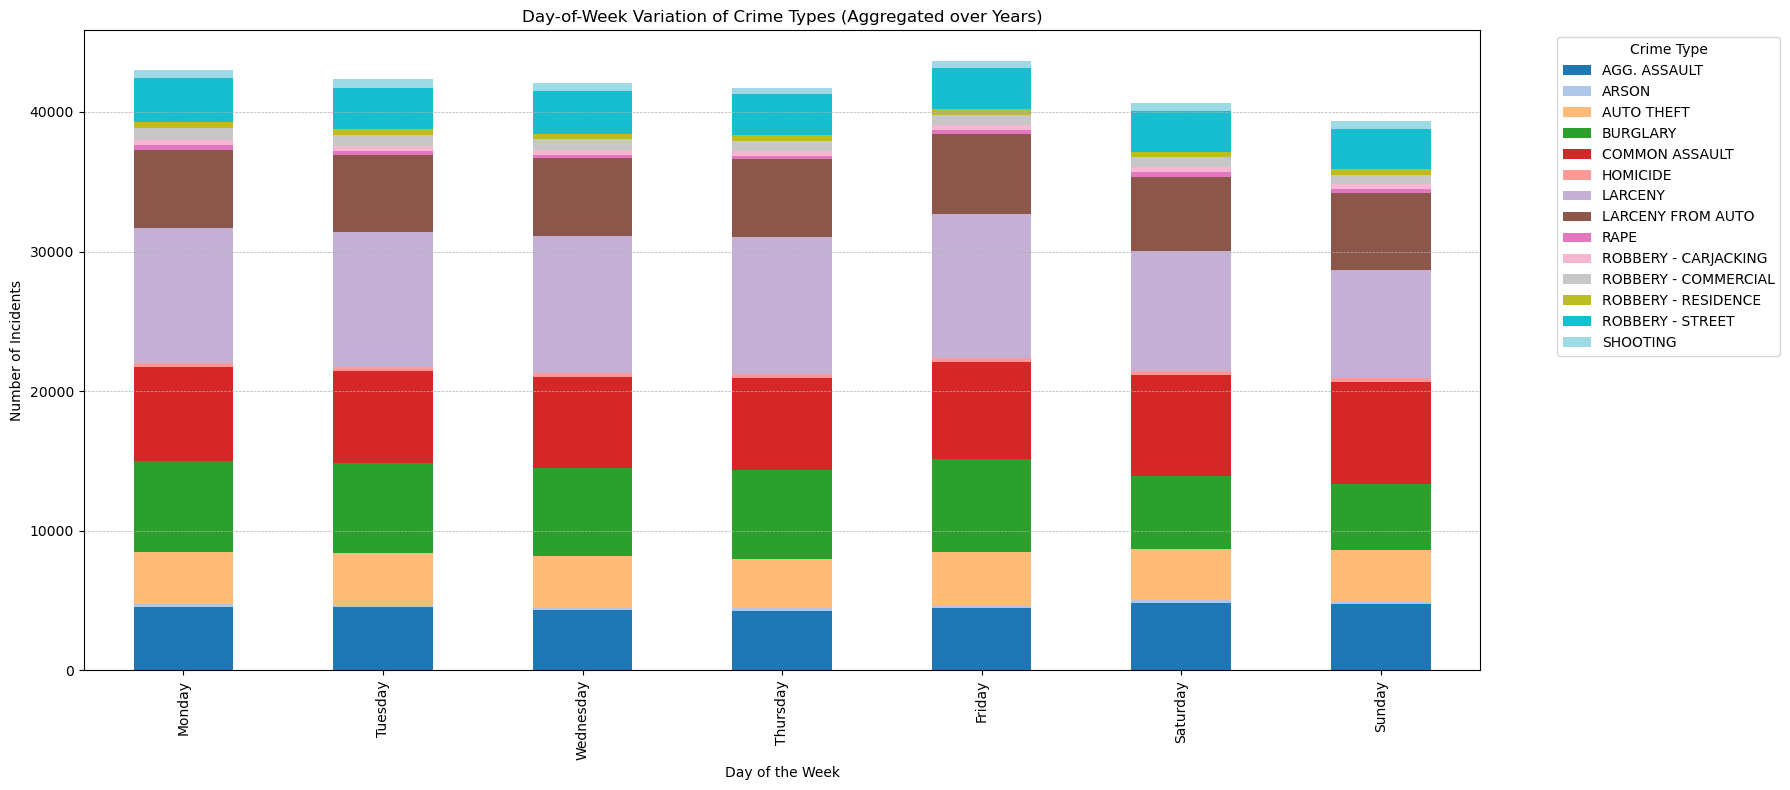

In [33]:
# 4. 

# Day-of-Week Variation of Crime Types

# Group by day of the week and crime description to get counts
dow_crime_counts = df.groupby(['DayOfWeek', 'Description']).size().unstack().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).fillna(0)

# Plotting
plt.figure(figsize=(18, 10))
dow_crime_counts.plot(kind='bar', stacked=True, figsize=(18, 8), colormap='tab20')

plt.title('Day-of-Week Variation of Crime Types (Aggregated over Years)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()